In [1]:
from models.direct.GmshSplit.RunGmshSplit import RunGmshSplit
from models.direct.GmshSplit.default import default as defaultGmshSplit
import os,glob

In [2]:
main_path = ["output"]
join = os.path.join
lmp_path = glob.glob(join(".." , "T01_lammps", "output", "*"))
lmp_path = [ os.path.basename(i).replace(".json","") for i in lmp_path]

In [3]:
params_gmsh = defaultGmshSplit()
params_gmsh["factor_mesh_min"] = 1.8
params_gmsh["factor_mesh_max"] = 2.1
params_gmsh["factor_length"] = 0.5
params_gmsh["factor_radius"] = 0.85

params_gmsh["debug"] = True
params_gmsh["lammps_path"] = lmp_path[-1]

In [4]:
from tools.step.runstep import runstep,lj,address
import numpy as np
params_lmp = lj("2024-08-28__14-31-10__35704")
trajs = params_lmp["trajs"]
trajs = [trajs[trajs["type"] == i][["xu","yu","zu"]].values
        for i in trajs["type"].unique()]

In [5]:
trajs[0].shape

(92, 3)

In [6]:
le = 1
for i in range(64):
    r0 = trajs[i][0]
    rf = trajs[i][-1]

    # igual x,y and change z 
    r0_new = [r0[0],r0[1],r0[2] + le]
    rf_new = [rf[0],rf[1],rf[2] - le]

    # 
    Nsteps = 10
    r0_list = [ r0 + (r0 - r0_new) * (j / Nsteps)**0.9 for j in range(1,Nsteps)]
    r0_list = np.vstack(r0_list)
    # reverse 
    r0_list = r0_list[::-1]
    rf_list = [ rf + (rf - rf_new) * (j / Nsteps)**0.9 for j in range(1,Nsteps)]
    rf_list = np.vstack(rf_list)
    # reverse

    trajs[i] = np.vstack([r0_list,trajs[i][1:-1],rf_list])
    #trajs[i] = np.vstack([trajs[i],rf_list])


In [7]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import splrep, BSpline


In [8]:
%matplotlib ipympl

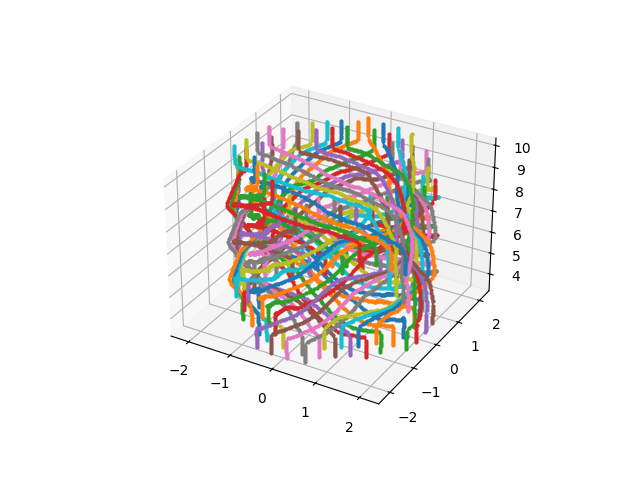

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(64):
    plt.plot(trajs[i][:,0],trajs[i][:,1],trajs[i][:,2],marker="o",ms=2)

In [10]:
trajs[i][:,2]

array([ 3.37948742,  3.47096785,  3.56360215,  3.65757413,  3.75313327,
        3.85063671,  3.95063654,  4.05409621,  4.16312746,  4.33896   ,
        4.38936   ,  4.44103   ,  4.49428   ,  4.54931   ,  4.60613   ,
        4.66476   ,  4.72511   ,  4.78711   ,  4.84967   ,  4.91624   ,
        4.97009   ,  5.02459   ,  5.08027   ,  5.13771   ,  5.19537   ,
        5.2527    ,  5.30931   ,  5.36488   ,  5.41923   ,  5.47218   ,
        5.52356   ,  5.57369   ,  5.62354   ,  5.67411   ,  5.72704   ,
        5.77894   ,  5.82859   ,  5.87885   ,  5.93203   ,  5.9879    ,
        6.04351   ,  6.09816   ,  6.15253   ,  6.20777   ,  6.26196   ,
        6.31582   ,  6.36883   ,  6.42147   ,  6.4769    ,  6.53202   ,
        6.59053   ,  6.65238   ,  6.7132    ,  6.77363   ,  6.832     ,
        6.88959   ,  6.94553   ,  6.99873   ,  7.04891   ,  7.09869   ,
        7.14864   ,  7.19878   ,  7.24902   ,  7.29935   ,  7.35024   ,
        7.40314   ,  7.46049   ,  7.52249   ,  7.5837    ,  7.64

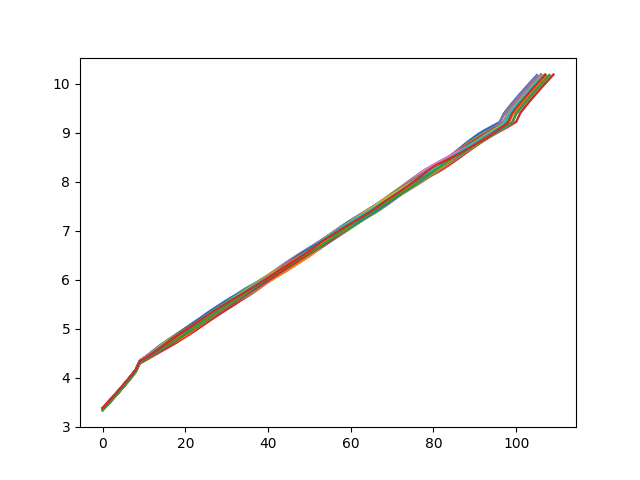

In [11]:
fig = plt.figure()
for i in range(64):
    plt.plot(trajs[i][:,2])


In [12]:
RunGmshSplit(params_gmsh, main_path)

Trajectory  1
Size of last segment:  9
Done
Trajectory  2
Size of last segment:  9
Done
Trajectory  3
Size of last segment:  10
Done
Trajectory  4
Size of last segment:  9
Done
Trajectory  5
Size of last segment:  9
Done
Trajectory  6
Size of last segment:  9
Done
Trajectory  7
Size of last segment:  9
Done
Trajectory  8
Size of last segment:  8
Done
Trajectory  9
Size of last segment:  9
Done
Trajectory  10
Size of last segment:  9
Done
Trajectory  11
Size of last segment:  10
Done
Trajectory  12
Size of last segment:  9
Done
Trajectory  13
Size of last segment:  9
Done
Trajectory  14
Size of last segment:  9
Done
Trajectory  15
Size of last segment:  8
Done
Trajectory  16
Size of last segment:  8
Done
Trajectory  17
Size of last segment:  9
Done
Trajectory  18
Size of last segment:  9
Done
Trajectory  19
Size of last segment:  10
Done
Trajectory  20
Size of last segment:  9
Done
Trajectory  21
Size of last segment:  9
Done
Trajectory  22
Size of last segment:  9
Done
Trajectory  23
S

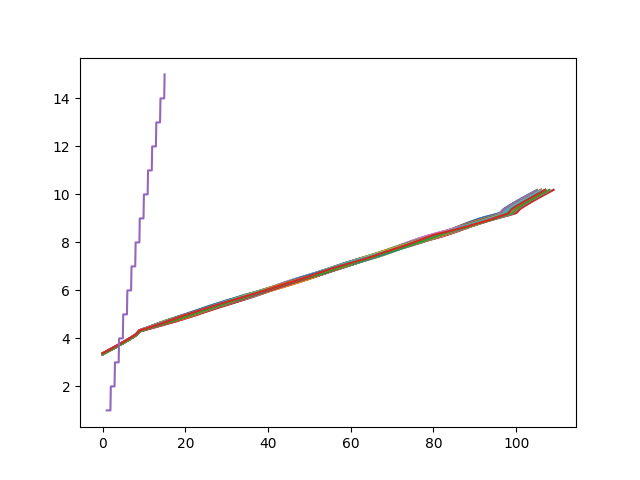

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.int64(x)

x = np.arange(1, 15.1, 0.1)
plt.plot(x, f(x))
plt.show()

In [14]:
from tools.step.rerun import rerun